In [127]:
import pandas as pd
import matplotlib.pyplot as plt

In [128]:
df = pd.read_csv('covid-data.csv')

In [129]:
df['date'] = pd.to_datetime(df['date'])

In [130]:
pd.set_option('display.max_rows', 187)
pd.set_option('display.max_columns', 50)

# A1

In [131]:
date_greek_lockdown_started = df[(df['date'] == '2020-03-23') & (df['location'] != 'World')]['total_cases'].max()
location = df.loc[df['total_cases'] == date_greek_lockdown_started] #A1

#Variables to save name and number of cases
name = location.iloc[0,2]
total_cases = location.iloc[0,4]

print(f"{name} had the most total cases ({total_cases.astype(int)}) when Greece's lockdown started")

China had the most total cases (81484) when Greece's lockdown started


# A2

In [132]:
second_to_last_week_of_march = df[(df['date'] >= '2020-03-23') & (df['date'] <= '2020-03-29') & (df['location'] != 'World')]['new_cases'].max()
location = df.loc[df['new_cases'] == second_to_last_week_of_march] #A2 
#Needs output with name and number of new cases

name = location.iloc[0,2]
new_cases = location.iloc[0,5]

print(f"{name} had the most new cases ({new_cases.astype(int)}) during 23-29/03/2020")

United States had the most new cases (19979) during 23-29/03/2020


# A3

In [133]:
greece = (df['location'] == 'Greece')

dates_before_first_lockdown = df[greece & ((df['date'] >= '2020-03-16') & (df['date'] <= '2020-03-22'))] #A3
sum_of_new_cases_before_first_lockdown = dates_before_first_lockdown['new_cases'].sum()

dates_before_second_lockdown = df[greece & ((df['date'] >= '2020-10-31') & (df['date'] <= '2020-11-06'))] #A3 
sum_of_new_cases_before_second_lockdown = dates_before_second_lockdown['new_cases'].sum()

print(f'Before the first lockdown (16-22/3/2020) Greece had: {sum_of_new_cases_before_first_lockdown.astype(int)} cases')
print(f'Before the second lockdown (31/10/2020 - 6/11/2020) Greece had: {sum_of_new_cases_before_second_lockdown.astype(int)} cases')

Before the first lockdown (16-22/3/2020) Greece had: 302 cases
Before the second lockdown (31/10/2020 - 6/11/2020) Greece had: 14297 cases


# A4

In [134]:
max_total_deaths_per_million = df["total_deaths_per_million"].max()
location = df.loc[df['total_deaths_per_million'] == max_total_deaths_per_million]

name = location.iloc[0,2]
total_deaths_per_million = location.iloc[0,13]

print(f'{name} had the most total deaths per million: {total_deaths_per_million.round(decimals=2)}')

Belgium had the most total deaths per million: 1350.09


# A5

In [135]:
all_locations_latest_date = df[(df['date'] == df['date'].max()) & (df['location'] != 'World') & (df['location'] != 'International')]
max_percentage = all_locations_latest_date['total_deaths'].div(all_locations_latest_date['total_cases']).max()

location_with_most_deaths_per_case = all_locations_latest_date['total_deaths'].div(all_locations_latest_date['total_cases']) == max_percentage
name = all_locations_latest_date[location_with_most_deaths_per_case]['location'].iloc[0]

print(f'{name} has the most deaths per case: {(max_percentage*100).round(decimals=2)}%')

Yemen has the most deaths per case: 28.9%


# B1

In [136]:
greece_new_deaths_and_cases = df[greece].groupby(df[greece]['date'].dt.month)[['new_deaths', 'new_cases']].agg(['median','std']).round(decimals = 2)
greece_new_deaths_and_cases

new_deaths        new_cases        
         median    std    median     std
date                                    
1           0.0   0.00       0.0    0.00
2           0.0   0.00       0.0    0.44
3           1.0   1.84      35.0   31.87
4           3.0   2.43      32.0   39.83
5           1.0   1.04      10.0    8.72
6           0.0   0.90      14.0   12.07
7           0.0   0.72      29.0   14.38
8           2.0   1.62     193.0   62.54
9           4.0   2.19     255.5   82.85
10          7.0   3.50     438.0  378.47
11         41.0  28.64    2402.5  621.04
12          0.0    NaN       0.0     NaN

# B2

In [137]:
portugal = df['location'] == "Portugal"

portugal_new_deaths_and_cases = df[portugal].groupby(df[portugal]['date'].dt.month)[['new_deaths', 'new_cases']].agg(['median','std']).round(decimals = 2)
portugal_new_deaths_and_cases

new_deaths        new_cases         
         median    std    median      std
date                                     
2           NaN    NaN       NaN      NaN
3           0.0   7.51      86.0   271.80
4          27.5   8.33     620.5   280.45
5          13.0   6.58     228.0   137.89
6           5.5   3.78     327.0    75.00
7           5.0   3.07     291.0    98.83
8           3.0   1.83     213.0    88.33
9           4.0   2.62     595.0   191.78
10         15.0   9.02    1876.0  1151.11
11         62.0  14.81    5667.0  1555.36

In [138]:
greece_new_deaths_and_cases.sum()

new_deaths  median      59.00
            std         42.88
new_cases   median    3409.00
            std       1252.21
dtype: float64

In [139]:
portugal_new_deaths_and_cases.sum()

new_deaths  median     135.00
            std         57.55
new_cases   median    9903.50
            std       3850.55
dtype: float64

In [140]:
print('Based on the above data Greece does better than Portugal')

Based on the above data Greece does better than Portugal


# B3

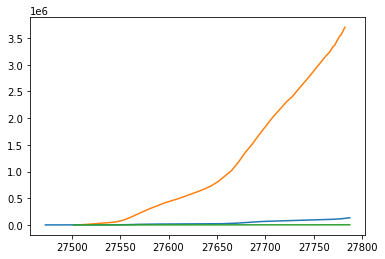

In [156]:
pd.set_option('display.max_rows', 330)
pd.set_option('display.max_columns', 50)

japan = df['location'] == 'Japan'

japan_A = df[japan].groupby(df[japan]['date'].dt.month)[['new_deaths', 'new_cases']].agg(['median','std']).round(decimals = 2)

#a = df[japan]['total_cases'].dropna()
japan_total_cases = df[japan]['total_cases'].dropna()
japan_total_tests = df[japan]['total_tests'].dropna()
japan_total_deaths = df[japan]['total_deaths'].dropna()

plt.plot(japan_total_cases)
plt.plot(japan_total_tests)
plt.plot(japan_total_deaths)

In [ ]:
#plt.plot(japan_total_tests)

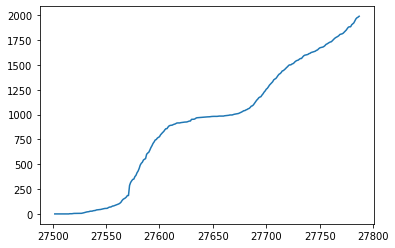

In [143]:
#plt.plot(japan_total_deaths)

In [155]:
print('Japan:\nMinimum Cases:',japan_total_cases.min().astype(int))
print('Maximum Cases:',japan_total_cases.max().astype(int))
print('Average Number of Cases:',japan_total_cases.mean().round(decimals=2))
print('Variance:',japan_total_cases.var().round(decimals=2))
print('Standard Deviation:',japan_total_cases.std().round(decimals=2))

Japan:
Minimum Cases: 1
Maximum Cases: 133929
Average Number of Cases: 36704.37
Variance: 1450026028.23
Standard Deviation: 38079.21
